# Data Science Best practices with Pandas - PyCon 2019
Exercises given and taught by Kevin Markham.

## 1. Introduction to the dataset

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
pd.__version__

'0.23.4'

In [51]:
%matplotlib inline


In [52]:
ted = pd.read_csv('ted.csv')

In [53]:
ted.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [54]:
ted.shape

(2550, 17)

In [55]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [56]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

## 2. Which talks provoke the most online discussion?

In [74]:
ted['comments_per_view'] = ted.comments / ted.views
ted.sort_values('comments_per_view', ascending=False).head(5)


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,views,comments_per_view,date,new_ratings,score,scoreperview,num_ratings,funny_score,fun_rating,funny_rate
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,...,292395,0.002220,2009-12-02,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...",2585,0.008841,2919,0,98,0.033573
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,...,543551,0.001534,2010-07-14,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...",1547,0.002846,1845,0,1,0.000542
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,...,4374792,0.001464,2002-02-02,"[{'id': 3, 'name': 'Courageous', 'count': 3236...",12458,0.002848,14904,0,1203,0.080717
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,...,1057238,0.001421,2010-02-10,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...",1706,0.001614,1896,0,5,0.002637
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,...,1832930,0.001360,2011-03-03,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...",3904,0.002130,4158,0,16,0.003848


## 3. Visualize the distrubution of comments.

In [75]:
help(ted.plot)

Help on FramePlotMethods in module pandas.plotting._core object:

class FramePlotMethods(BasePlotMethods)
 |  DataFrame plotting accessor and method
 |  
 |  Examples
 |  --------
 |  >>> df.plot.line()
 |  >>> df.plot.scatter('x', 'y')
 |  >>> df.plot.hexbin()
 |  
 |  These plotting methods can also be accessed by calling the accessor as a
 |  method with the ``kind`` argument:
 |  ``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
 |  
 |  Method resolution order:
 |      FramePlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, font

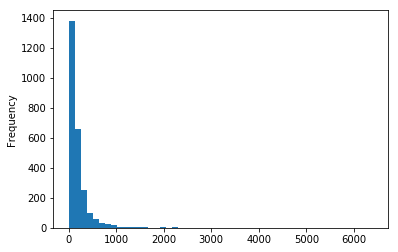

In [76]:
ted.comments.plot.hist(bins=50)

## 4. Plot the number of talks that took place each year.

In [77]:

pd.to_datetime(ted.film_date, unit="s")
ted['date'] = pd.to_datetime(ted.film_date, unit="s")


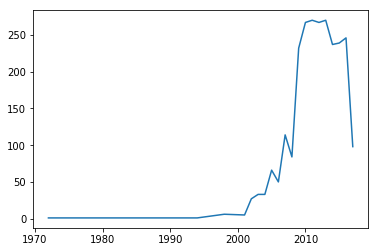

In [78]:
ted.date.dt.year.value_counts().sort_index().plot()

# 5 & 6. What were the best events in TED history to attend?

In [79]:
from ast import literal_eval
ted['new_ratings'] = ted.ratings.apply(lambda x: literal_eval(x))
ratings = {}
for value in ted.new_ratings.iteritems():
    for item in value[1]:
        ratings[item['name']] = 0
print(ratings)
ratings = {'Funny': 1, 'Beautiful': 1, 'Ingenious': 1, 'Courageous': 1, 'Longwinded': -1, 'Confusing': -1, 'Informative': 1, 'Fascinating': 1, 'Unconvincing': -1, 'Persuasive': 1, 'Jaw-dropping': 1, 'OK': 1, 'Obnoxious': -1, 'Inspiring': 1}
print(ratings)


{'Funny': 0, 'Beautiful': 0, 'Ingenious': 0, 'Courageous': 0, 'Longwinded': 0, 'Confusing': 0, 'Informative': 0, 'Fascinating': 0, 'Unconvincing': 0, 'Persuasive': 0, 'Jaw-dropping': 0, 'OK': 0, 'Obnoxious': 0, 'Inspiring': 0}
{'Funny': 1, 'Beautiful': 1, 'Ingenious': 1, 'Courageous': 1, 'Longwinded': -1, 'Confusing': -1, 'Informative': 1, 'Fascinating': 1, 'Unconvincing': -1, 'Persuasive': 1, 'Jaw-dropping': 1, 'OK': 1, 'Obnoxious': -1, 'Inspiring': 1}


In [80]:

ted['score'] = [sum([ratings[dic['name']]*dic['count'] for dic in value]) for value in ted.new_ratings]
#ted.score.apply([sum(value['name']*value['count']) for value in ted.new_ratings])
#ted.new_ratings

In [81]:
ted['scoreperview'] = ted.score / ted.views
ted.groupby('event').scoreperview.agg(['count','mean','sum']).sort_values('sum').tail()

,count,mean,sum
event,,,
TEDGlobal 2011,68,0.001516,0.103077
TED2009,83,0.001310,0.108732
TED2010,68,0.001644,0.111793
TED2007,68,0.001683,0.114423
TED2011,70,0.001635,0.114477


## 7. Count the total number of ratings received by each talk.

In [82]:
ted['num_ratings'] = [sum([dic['count'] for dic in value]) for value in ted.new_ratings]

In [83]:
ted.num_ratings.describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

## 8. Which occupations deliver the funniest TED talks on average?

In [84]:
ted['funny_score'] = 0
def get_fun(listofdicts):
    for d in listofdicts:
        if d['name'] == 'Funny':
            funny_score = d['count']
    return funny_score

print(ted.new_ratings[0])
print(get_fun(ted.new_ratings[0]))
ted['fun_rating'] = ted.new_ratings.apply(get_fun)


[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]
19645


In [99]:
ted.groupby('speaker_occupation').fun_rating.mean().sort_values(ascending=False).head(10)

speaker_occupation
Author/educator                                   6190.0
Comedian and writer                               4970.5
Blogger                                           3773.0
Actor, comedian, playwright                       3254.5
Vulnerability researcher                          3088.0
Comedian and writer                               2779.0
Professor of Economics, University of Waterloo    1960.0
Gentleman thief                                   1864.0
Author, blogger, entrepreneur                     1856.0
Comedian                                          1839.0
Name: fun_rating, dtype: float64

In [86]:
ted['funny_rate'] = ted.fun_rating / ted.num_ratings

In [97]:
ted.groupby('speaker_occupation').funny_rate.mean().sort_values(ascending=False).head(10)

speaker_occupation
Comedian and writer            0.602085
Jugglers                       0.566828
Actor, comedian, playwright    0.558107
Actor, writer                  0.515152
Comedian                       0.512457
Satirist                       0.512383
Cartoon editor                 0.511628
Comedian, voice artist         0.503542
Social energy entrepreneur     0.502117
Science humorist               0.468405
Name: funny_rate, dtype: float64

In [98]:
# There is many unique speakers with an unique occupation that happen to be funny. To generalize to occupation we should have a bigger sample size. I took occupations that have at least 5 speakers. 
occupation_counts = ted.speaker_occupation.value_counts()
top_occupations = occupation_counts[occupation_counts >= 5].index
ted_top_occupations = ted[ted.speaker_occupation.isin(top_occupations)]
ted_top_occupations = ted[ted.speaker_occupation.isin(top_occupations)]
ted_top_occupations.groupby('speaker_occupation').funny_rate.mean().sort_values(ascending=False).head(10)

speaker_occupation
Comedian                                0.512457
Performance poet, multimedia artist     0.306468
Singer/songwriter                       0.252205
Producer                                0.202531
Data scientist                          0.184076
Cartoonist                              0.162120
Techno-illusionist                      0.152171
Graphic designer                        0.135718
Poet                                    0.107398
Global health expert; data visionary    0.090306
Name: funny_rate, dtype: float64